# Eda For ticket Data
Camden Bibro

In [1]:
import pandas as pd

In [2]:
def load_csv_from_github(file_name):
    base_url = "https://raw.githubusercontent.com/marymorkos/SalesPlaybookDS5640/refs/heads/main/"
    return pd.read_csv(base_url + file_name)

In [9]:
tickets_df = pd.read_csv('anonymized_hubspot_tickets.csv')
print(tickets_df.head())
print(tickets_df.columns)

        Create date  Ticket Tags Stage Date - Project Launch  \
0  2023-12-18 15:02          NaN                         NaN   
1  2024-10-30 12:31          NaN                         NaN   
2  2024-12-12 09:01          NaN                  2025-01-10   
3  2023-09-07 16:37          NaN                         NaN   
4  2025-02-14 13:34          NaN                         NaN   

  Associated Contact  Category Target Launch Date Kickoff Call  \
0   Contact_b6d930b5       NaN                NaN   2023-12-27   
1   Contact_aa84b2e1       NaN                NaN          NaN   
2   Contact_fec7b624       NaN                NaN   2024-12-10   
3   Contact_11c92d4d       NaN         2023-10-02   2023-06-08   
4   Contact_78b60b6b       NaN                NaN          NaN   

         Close date              Pipeline Stage Date - Project Initiation  \
0  2024-01-29 11:50  Project Success Plan                      2023-12-18   
1  2025-02-10 11:18  Project Success Plan                       

In [3]:
tickets_df = load_csv_from_github("anonymized_hubspot_tickets.csv")

In [4]:
tickets_df.columns = [col.strip().lower().replace(" ", "_") for col in tickets_df.columns]

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/var/folders/qr/ddtvwtlx5xvc5jyb2sw669y00000gn/T/ipykernel_44523/237498622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_status_counts.index, y=ticket_status_counts.values, palette='viridis')


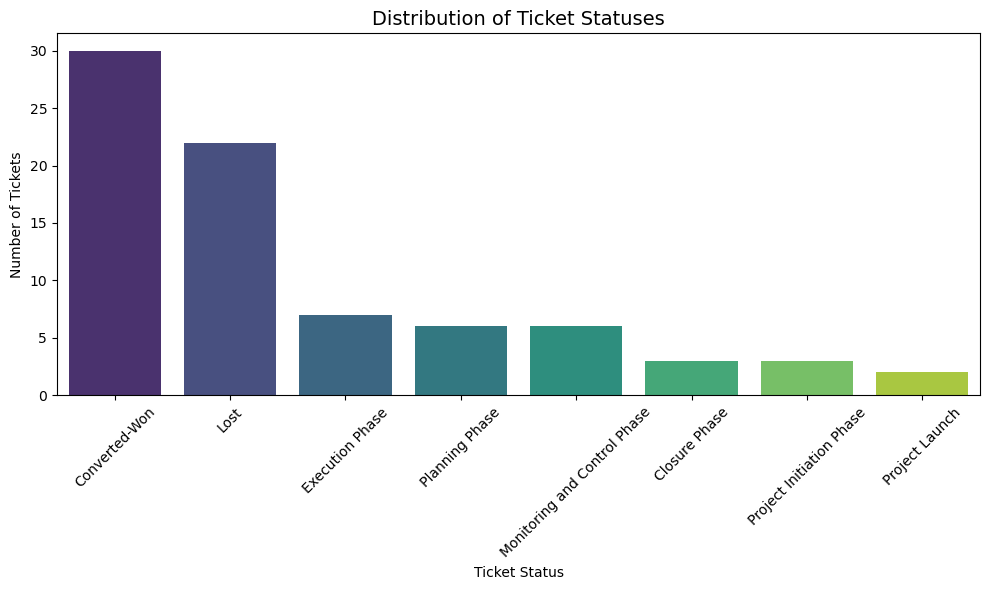

In [11]:

# Count the frequency of each ticket status
ticket_status_counts = tickets_df['Ticket status'].value_counts()

# Plot the distribution of ticket statuses
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_status_counts.index, y=ticket_status_counts.values, palette='viridis')
plt.title("Distribution of Ticket Statuses", fontsize=14)
plt.ylabel("Number of Tickets")
plt.xlabel("Ticket Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qr/ddtvwtlx5xvc5jyb2sw669y00000gn/T/ipykernel_44523/250427804.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_progression.values, y=stage_progression.index, palette='viridis')


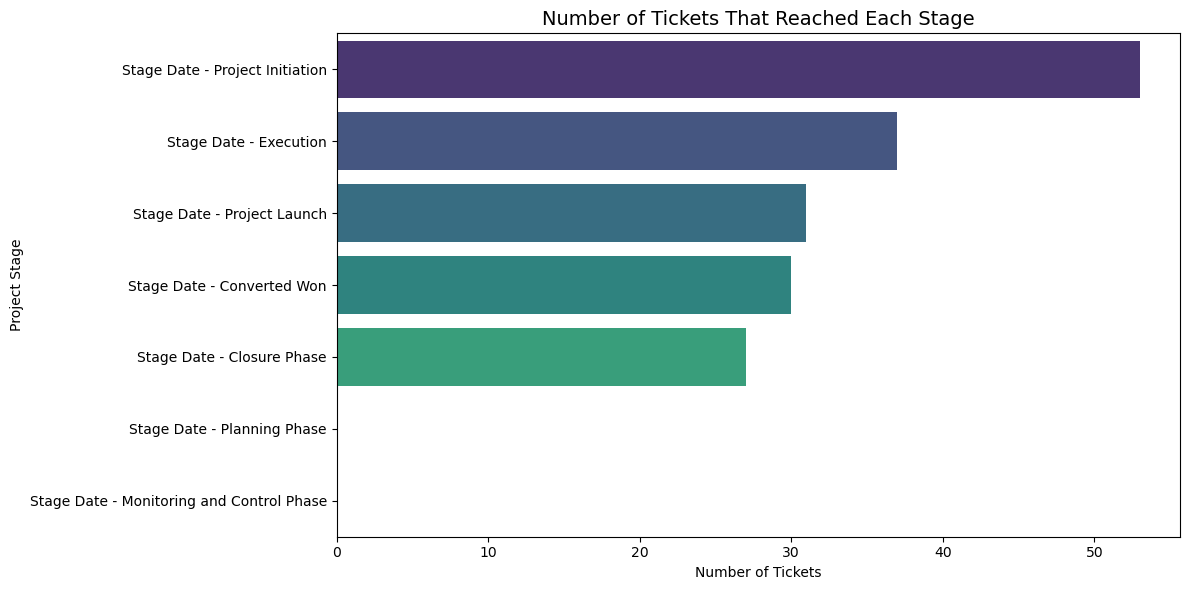

In [14]:
# Select all columns related to stage dates
stage_cols = [col for col in tickets_df.columns if "Stage Date" in col]

# Create a DataFrame counting non-null entries (indicating progression to that stage)
stage_progression = tickets_df[stage_cols].notnull().sum().sort_values(ascending=False)

# Plot stage progression
plt.figure(figsize=(12, 6))
sns.barplot(x=stage_progression.values, y=stage_progression.index, palette='viridis')
plt.title("Number of Tickets That Reached Each Stage", fontsize=14)
plt.xlabel("Number of Tickets")
plt.ylabel("Project Stage")
plt.tight_layout()
plt.show()

In [ ]:
# Create a copy of the dataset for processing
df_stages = tickets_df[['Ticket ID'] + stage_cols].copy()


for col in stage_cols:
    df_stages[col] = pd.to_datetime(df_stages[col], errors='coerce')

stage_order = [
    'Stage Date - Project Initiation',
    'Stage Date - Planning Phase',
    'Stage Date - Execution',
    'Stage Date - Monitoring and Control Phase',
    'Stage Date - Closure Phase',
    'Stage Date - Project Launch',
    'Stage Date - Converted Won'
]

# Filter to only include existing columns from the list
stage_order = [stage for stage in stage_order if stage in df_stages.columns]

# Calculate duratio between each consecutive stage
duration_data = {}
for i in range(len(stage_order) - 1):
    start = stage_order[i]
    end = stage_order[i + 1]
    duration_name = f"{start} → {end}"
    duration_data[duration_name] = (df_stages[end] - df_stages[start]).dt.days

duration_df = pd.DataFrame(duration_data)

display(duration_df)

,Stage Date - Project Initiation → Stage Date - Planning Phase,Stage Date - Planning Phase → Stage Date - Execution,Stage Date - Execution → Stage Date - Monitoring and Control Phase,Stage Date - Monitoring and Control Phase → Stage Date - Closure Phase,Stage Date - Closure Phase → Stage Date - Project Launch,Stage Date - Project Launch → Stage Date - Converted Won
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,-144.0,275.0


In [ ]:
df_stages['num_stages_completed'] = df_stages[stage_order].notnull().sum(axis=1)

df_filtered = df_stages[df_stages['num_stages_completed'] >= 3].copy()

filtered_preview = df_filtered[['Ticket ID', 'num_stages_completed'] + stage_order]

display(filtered_preview.head(100))

,Ticket ID,num_stages_completed,Stage Date - Project Initiation,Stage Date - Planning Phase,Stage Date - Execution,Stage Date - Monitoring and Control Phase,Stage Date - Closure Phase,Stage Date - Project Launch,Stage Date - Converted Won
0,2193923207,4,2023-12-18,NaT,2024-01-02,NaT,2024-01-29,NaT,2024-02-06
2,17452741013,3,2024-12-13,NaT,2025-01-03,NaT,NaT,2025-01-10,NaT
5,3049197180,4,2024-07-31,NaT,2024-09-13,NaT,2024-12-20,2024-10-04,NaT
6,3049195860,4,2024-07-31,NaT,2024-09-20,NaT,2024-12-20,2024-10-15,NaT
7,3295514681,4,2024-09-10,NaT,2024-10-11,NaT,2024-12-20,NaT,2025-01-14
9,2143836064,4,2023-12-05,NaT,2023-12-05,NaT,NaT,2023-12-18,2024-02-07
10,2564027492,5,2024-04-03,NaT,2024-04-30,NaT,2024-11-19,2024-08-08,2024-12-04
15,3021671720,5,2024-07-26,NaT,2024-09-13,NaT,2024-11-19,2024-10-10,2024-12-04
20,2753363511,4,2024-05-22,NaT,2024-06-21,NaT,NaT,2024-06-21,2024-09-20
21,2751936415,5,2024-05-22,NaT,2024-07-19,NaT,2024-11-22,2024-09-13,2025-01-03


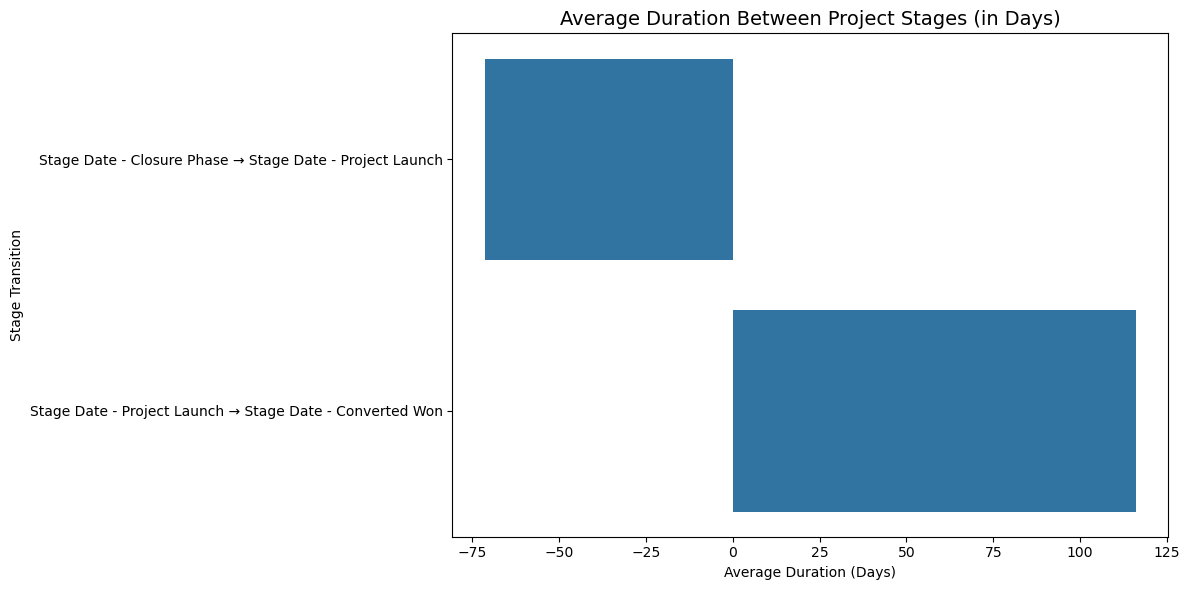

In [ ]:
# Recalculate stage durations for tickets with 3+ completed stages
duration_data_filtered = {}
for i in range(len(stage_order) - 1):
    start = stage_order[i]
    end = stage_order[i + 1]
    duration_name = f"{start} → {end}"
    duration_data_filtered[duration_name] = (df_filtered[end] - df_filtered[start]).dt.days

duration_filtered_df = pd.DataFrame(duration_data_filtered)

avg_durations = duration_filtered_df.mean().dropna().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_durations.values, y=avg_durations.index)
plt.title("Average Duration Between Project Stages (in Days)", fontsize=14)
plt.xlabel("Average Duration (Days)")
plt.ylabel("Stage Transition")
plt.tight_layout()
plt.show()

In [21]:
df = tickets_df.copy

In [ ]:
feature_df = df_filtered.copy()

feature_df = feature_df.merge(df[['Ticket ID', 'Create date', 'Close date']], on='Ticket ID', how='left')
feature_df['total_duration_days'] = (feature_df['Close date'] - feature_df['Create date']).dt.days

feature_df['create_month'] = feature_df['Create date'].dt.month
feature_df['create_dayofweek'] = feature_df['Create date'].dt.dayofweek
feature_df['create_hour'] = feature_df['Create date'].dt.hour
feature_df['is_weekend'] = feature_df['create_dayofweek'].isin([5, 6]).astype(int)

feature_df['converted_won'] = feature_df['Stage Date - Converted Won'].notnull().astype(int)

 # Number of stage transitions with durations
duration_cols = duration_filtered_df.columns
feature_df = pd.concat([feature_df.reset_index(drop=True), duration_filtered_df.reset_index(drop=True)], axis=1)
feature_df['num_transitions_with_duration'] = duration_filtered_df.notnull().sum(axis=1)

# Drop any duplicate or irrelevant columns for modeling
model_ready_df = feature_df[[
    'Ticket ID', 'num_stages_completed', 'total_duration_days', 'create_month', 'create_dayofweek',
    'create_hour', 'is_weekend', 'converted_won', 'num_transitions_with_duration'
] + list(duration_cols)]

display(model_ready_df)

TypeError: 'method' object is not subscriptable

In [ ]:
tickets_df['Create date'] = pd.to_datetime(tickets_df['Create date'], errors='coerce')
tickets_df['Close date'] = pd.to_datetime(tickets_df['Close date'], errors='coerce')

feature_df = feature_df.drop(columns=['Create date', 'Close date'], errors='ignore')
feature_df = feature_df.merge(tickets_df[['Ticket ID', 'Create date', 'Close date']], on='Ticket ID', how='left')

feature_df['total_duration_days'] = (feature_df['Close date'] - feature_df['Create date']).dt.days

feature_df['create_month'] = feature_df['Create date'].dt.month
feature_df['create_dayofweek'] = feature_df['Create date'].dt.dayofweek
feature_df['create_hour'] = feature_df['Create date'].dt.hour
feature_df['is_weekend'] = feature_df['create_dayofweek'].isin([5, 6]).astype(int)

# Flag if 'Converted Won' stage was reached
feature_df['converted_won'] = feature_df['Stage Date - Converted Won'].notnull().astype(int)

# Add  features and count of valid transitions
feature_df = pd.concat([feature_df.reset_index(drop=True), duration_filtered_df.reset_index(drop=True)], axis=1)
feature_df['num_transitions_with_duration'] = duration_filtered_df.notnull().sum(axis=1)

# Final cleaned feature dataset
model_ready_df = feature_df[[
    'Ticket ID', 'num_stages_completed', 'total_duration_days', 'create_month', 'create_dayofweek',
    'create_hour', 'is_weekend', 'converted_won', 'num_transitions_with_duration'
] + list(duration_filtered_df.columns)]

display(model_ready_df)

,Ticket ID,num_stages_completed,total_duration_days,create_month,create_dayofweek,create_hour,is_weekend,converted_won,num_transitions_with_duration,Stage Date - Project Initiation → Stage Date - Planning Phase,Stage Date - Planning Phase → Stage Date - Execution,Stage Date - Execution → Stage Date - Monitoring and Control Phase,Stage Date - Monitoring and Control Phase → Stage Date - Closure Phase,Stage Date - Closure Phase → Stage Date - Project Launch,Stage Date - Project Launch → Stage Date - Converted Won
0,2193923207,4,41.0,12,0,15,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,17452741013,3,NaN,12,3,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3049197180,4,142.0,7,2,10,0,0,0.0,NaN,NaN,NaN,NaN,-77.0,NaN
3,3049195860,4,142.0,7,2,10,0,0,NaN,NaN,NaN,NaN,NaN,-66.0,NaN
4,3295514681,4,101.0,9,1,9,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2143836064,4,63.0,12,1,13,0,1,1.0,NaN,NaN,NaN,NaN,NaN,51.0
6,2564027492,5,230.0,4,2,7,0,1,1.0,NaN,NaN,NaN,NaN,-103.0,118.0
7,3021671720,5,115.0,7,4,12,0,1,0.0,NaN,NaN,NaN,NaN,-40.0,55.0
8,2753363511,4,120.0,5,2,20,0,1,NaN,NaN,NaN,NaN,NaN,NaN,91.0
9,2751936415,5,183.0,5,2,11,0,1,1.0,NaN,NaN,NaN,NaN,-70.0,112.0


In [5]:
tickets_df.dropna(how="all", inplace=True)

In [6]:
date_cols = [col for col in tickets_df.columns if "date" in col or "time" in col]
for col in date_cols:
    tickets_df[col] = pd.to_datetime(tickets_df[col], errors="coerce")

/var/folders/qr/ddtvwtlx5xvc5jyb2sw669y00000gn/T/ipykernel_44523/388965820.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tickets_df[col] = pd.to_datetime(tickets_df[col], errors="coerce")
/var/folders/qr/ddtvwtlx5xvc5jyb2sw669y00000gn/T/ipykernel_44523/388965820.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tickets_df[col] = pd.to_datetime(tickets_df[col], errors="coerce")
/var/folders/qr/ddtvwtlx5xvc5jyb2sw669y00000gn/T/ipykernel_44523/388965820.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tickets_df[col] = pd.to_datetime(tickets_df[col], errors="coerce"

In [7]:
tickets_df["implementation_duration_days"] = (
    tickets_df["close_date"] - tickets_df["create_date"]
).dt.days

In [8]:
tickets_df["is_complete"] = tickets_df["implementation_duration_days"].notna()

In [9]:
drop_cols = ['was_the_sym_qaed?', 'ticket_tags', 'category']
tickets_df.drop(columns=drop_cols, inplace=True)

In [10]:
tickets_df['has_priority'] = tickets_df['priority'].notna().astype(int)
tickets_df['has_trial_required'] = tickets_df['trial_required'].notna().astype(int)
tickets_df['has_training_reporting'] = tickets_df['training:_reporting'].notna().astype(int)
tickets_df['has_training_sym201'] = tickets_df['training:_sym_building_201'].notna().astype(int)
tickets_df['responded_syms_creator'] = tickets_df['who_will_be_creating_the_syms?'].notna().astype(int)

In [11]:
print("Shape:", tickets_df.shape)
print("Remaining missing values:")
print(tickets_df.isnull().sum().sort_values(ascending=False).head(10))

Shape: (79, 50)
Remaining missing values:
last_ces_survey_rating                        79
stage_date_-_monitoring_and_control_phase     79
stage_date_-_planning_phase                   79
type                                          78
trial_required                                78
priority                                      78
time_to_close_(hh:mm:ss)                      77
who_will_be_creating_the_syms?                76
response_time_(hh:mm:ss)                      69
time_to_first_agent_email_reply_(hh:mm:ss)    69
dtype: int64


In [12]:
tickets_df['ticket_status'].value_counts()

ticket_status
Converted-Won                   30
Lost                            22
Execution Phase                  7
Planning Phase                   6
Monitoring and Control Phase     6
Closure Phase                    3
Project Initiation Phase         3
Project Launch                   2
Name: count, dtype: int64

In [13]:
tickets_df.groupby('ticket_status')['implementation_duration_days'].mean().sort_values()

ticket_status
Lost                            101.454545
Converted-Won                   116.600000
Closure Phase                   174.333333
Execution Phase                        NaN
Monitoring and Control Phase           NaN
Planning Phase                         NaN
Project Initiation Phase               NaN
Project Launch                         NaN
Name: implementation_duration_days, dtype: float64

In [14]:
tickets_df['is_complete'].value_counts(normalize=True)

is_complete
True     0.696203
False    0.303797
Name: proportion, dtype: float64

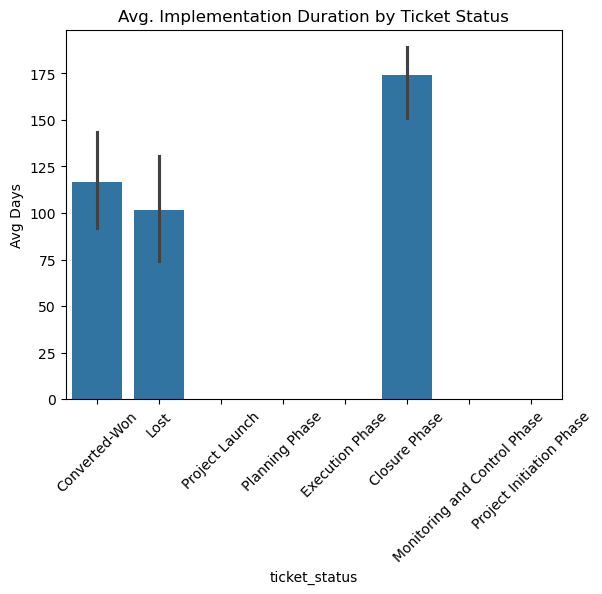

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of duration by status
sns.barplot(data=tickets_df, x='ticket_status', y='implementation_duration_days', estimator='mean')
plt.xticks(rotation=45)
plt.title("Avg. Implementation Duration by Ticket Status")
plt.ylabel("Avg Days")
plt.show()

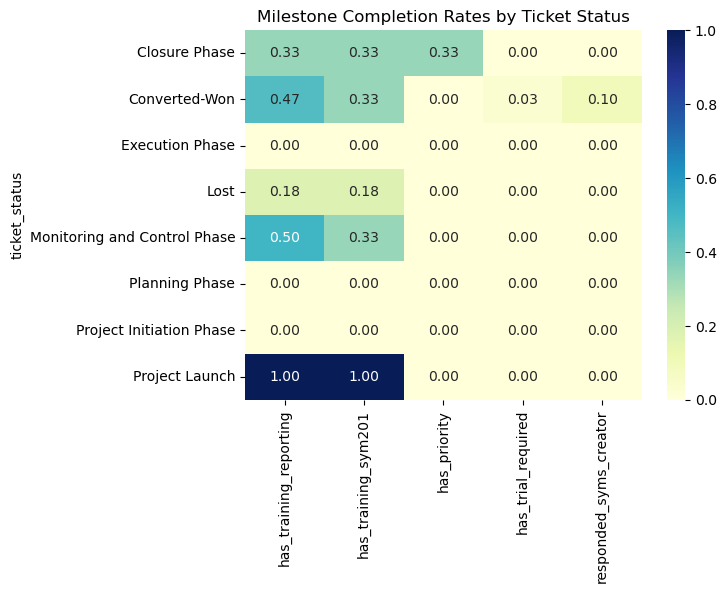

In [16]:
# Visualizing training and milestone completion rates by outcome
milestone_cols = [
    'has_training_reporting',
    'has_training_sym201',
    'has_priority',
    'has_trial_required',
    'responded_syms_creator'
]

sns.heatmap(
    tickets_df.groupby('ticket_status')[milestone_cols].mean(),
    annot=True, cmap='YlGnBu', fmt=".2f"
)
plt.title("Milestone Completion Rates by Ticket Status")
plt.show()

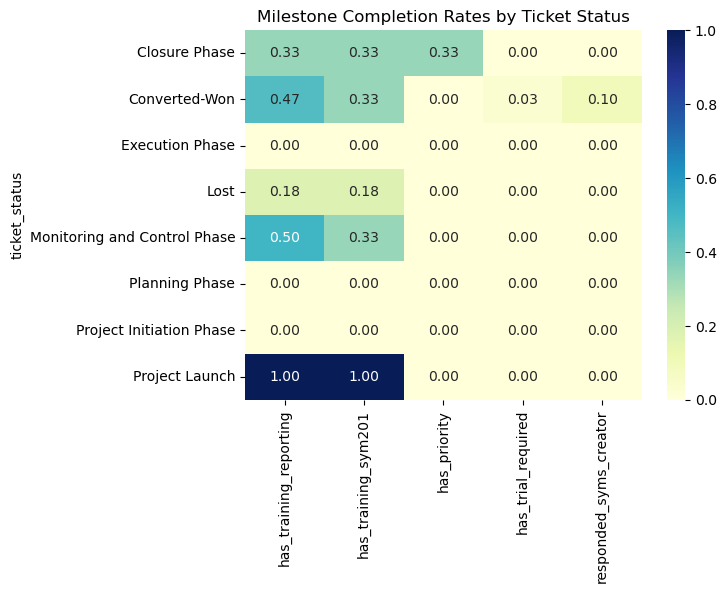

In [17]:
# Visualizing training and milestone completion rates by outcome
milestone_cols = [
    'has_training_reporting',
    'has_training_sym201',
    'has_priority',
    'has_trial_required',
    'responded_syms_creator'
]

sns.heatmap(
    tickets_df.groupby('ticket_status')[milestone_cols].mean(),
    annot=True, cmap='YlGnBu', fmt=".2f"
)
plt.title("Milestone Completion Rates by Ticket Status")
plt.show()

In [18]:
# Flag tickets that are incomplete AND old
tickets_df['at_risk'] = (tickets_df['is_complete'] == False) & (tickets_df['create_date'] < pd.to_datetime('2024-12-01'))

# See which types are most at-risk
tickets_df['at_risk'].value_counts()
tickets_df[tickets_df['at_risk'] == True]['ticket_status'].value_counts()

ticket_status
Monitoring and Control Phase    4
Planning Phase                  2
Execution Phase                 2
Project Initiation Phase        2
Project Launch                  1
Name: count, dtype: int64